In [1]:
from manim import *

KeyboardInterrupt: 

In [ ]:
class SoyMHIntro(Scene):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # define shared attributes for all subclasses
        self.SceneGroup = VGroup()
    def construct(self):
        # self.camera.background_color = WHITE
        image = ImageMobject(filename_or_array="/home/soymh/Downloads/176279314-2-logo.png")
        text= Text("SoyMH",font="B Zar").next_to(image,DOWN)
        LVGroup = Group(image, text)
        self.play(FadeIn(LVGroup))
        self.wait(2)
        self.play(LVGroup.animate.scale(0.25).to_corner(UL))
        self.wait(2)
%manim -qm -v WARNING --flush_cache SoyMHIntro

Manim Community v0.19.1

In [ ]:
class ShowExponents(SoyMHIntro):
    def MakeSeq(self, numbers: list = [1, 2, 4, 8, 16]):
        if len(numbers) < 5:
            return VGroup(Text("the length is less than 5"))
        
        num_mobjects = VGroup()
        for i, num in enumerate(numbers[:5]):
            if isinstance(num, (int, float)):
                tex = fr"{{{num}}}"
            else:
                tex = num
            num_mobjects.add(MathTex(tex))
        
        num_mobjects.add(MathTex(r"\ldots"))
        return num_mobjects.arrange(RIGHT, buff=0.5)

    def MakeArrows(self, seq, factor, spacing=0.25,start_buff=LEFT * 0.2,end_buff=LEFT * 0.2, factor_pos=0.1):
        arrows_and_nums = VGroup()
        arrows = VGroup()
        for i in range(4):
            start_point = seq[i].get_center() + start_buff
            end_point = seq[i+1].get_center() + end_buff
            
            arrow = Arrow(
                start_point, end_point,
                buff=0.05,
                max_tip_length_to_length_ratio=0.3,
                stroke_width=3,
            ).shift(UP * spacing + 0.15)
            arrow.rotate(0.1 * DEGREES, about_point=arrow.get_center())
            
            if isinstance(factor, str) and "frac" in factor:
                label_tex = rf"\times \small{{{factor}}}"
                label = MathTex(label_tex, font_size=40)
            else:
                label_tex = fr"\times{{{factor}}}"
                label = MathTex(label_tex, font_size=40)
                
            label.move_to(arrow.get_center() + UP * spacing + factor_pos*LEFT)
            arrow_group = VGroup(arrow, label)
            arrows_and_nums.add(arrow_group)
            arrows.add(arrow)
        
        return arrows_and_nums, arrows

    def construct(self):
        SoyMHIntro.construct(self=self)
        
        _1st_seq = self.MakeSeq()
        self.play(Write(_1st_seq), run_time=8)
        self.wait(1)
        
        self.arrows_and_nums, self.arrows = self.MakeArrows(_1st_seq, 2)
        
        for i, arrow_group in enumerate(self.arrows_and_nums):
            arrow = self.arrows[i]
            label = arrow_group[1]
            
            self.play(
                GrowArrow(arrow),
                Write(label),
                run_time=1
            )
        
        self.wait(2)
        
        self.SceneGroup = VGroup(self.arrows_and_nums, _1st_seq)
        self.geo_seq = Text("دنباله هندسی:", font="B Nazanin")
        self.geo_seq.next_to(self.SceneGroup, RIGHT*0.1, buff=0.2)
        
        self.play(self.SceneGroup.animate.move_to(LEFT*2 + UP * 0.2), Write(self.geo_seq))
        self.wait(2)


%manim -ql -v WARNING --disable_caching  ShowExponents

Manim Community v0.19.1

In [ ]:
class ExplainExponents(ShowExponents):
    def construct(self):
        ShowExponents.construct(self)
        
        self.play(
            self.geo_seq.animate.scale(0.9).shift(UP*1.7), 
            self.SceneGroup.animate.scale(0.8).shift(LEFT*2 + UP*1.7)
        )
        
        _2nd_geo_seq = self.MakeSeq(numbers=[3, 9, 27, 81, 243])
        _3rd_geo_seq = self.MakeSeq(numbers=[1, r"\frac{1}{2}", r"\frac{1}{4}", r"\frac{1}{8}", r"\frac{1}{16}"])
        
        _2nd_geo_seq.next_to(self.SceneGroup, DOWN, buff=1)
        _2nd_arrows_and_nums, _2nd_arrows = self.MakeArrows(_2nd_geo_seq, 3)
        
        _3rd_geo_seq.next_to(_2nd_geo_seq, DOWN*1.5, buff=1)
        _3rd_arrows_and_nums, _3rd_arrows = self.MakeArrows(_3rd_geo_seq, r"\frac{1}{2}", spacing=0.5, factor_pos=0.2)
        
        self.SeqsGroup = VGroup(_2nd_arrows_and_nums, _2nd_geo_seq, _3rd_arrows_and_nums, _3rd_geo_seq)
        self.SeqsGroup.scale(0.8)
        
        animations = []
        animations.extend([Write(seq) for seq in [_2nd_geo_seq, _3rd_geo_seq]])
        
        for i, arrow in enumerate(_2nd_arrows):
            animations.append(GrowArrow(arrow))
            animations.append(Write(_2nd_arrows_and_nums[i][1]))
            
        for i, arrow in enumerate(_3rd_arrows):
            animations.append(GrowArrow(arrow))
            animations.append(Write(_3rd_arrows_and_nums[i][1]))
            
        self.play(*animations, run_time=3)
        self.wait(2)


%manim -ql -v WARNING --disable_caching  ExplainExponents
        

Manim Community v0.19.1

In [ ]:
from manim import *

# Assuming ExplainExponents and previous classes are already defined as per your notebook

class How(ExplainExponents):
    def manage_scene(self, indices=None, action="indicate", new_mob=None, run_time=1.0):
        """
        A helper to manage self.SceneGroup easily.
        
        Args:
            indices: A list of integers (path to nested item), an int, a slice, or None.
            action: "indicate", "add", "remove", "transform", or "return".
            new_mob: The new mobject to add or transform into.
            run_time: Duration of the animation.
        """
        
        # --- Internal Helper: Find the item based on indices ---
        def get_nested_item(root, idx_path):
            current = root
            if idx_path is None:
                return current
            
            # Handle simple integer or slice
            if isinstance(idx_path, (int, slice)):
                return current[idx_path]
            
            # Handle list of depths (e.g., [0, 1] -> root[0][1])
            if isinstance(idx_path, list):
                for i in idx_path:
                    current = current[i]
                return current
            return current

        def remove_nested_item(root, target, indices=[0]):
            if indices is None:
                root.remove(*[obj for obj in root])
                return root

            if isinstance(indices, slice):
                root.remove(*target)
                return root

            # Sequence of indices for nested access
            if isinstance(indices, (list, tuple, VGroup)):
                current = root
                # Traverse to the parent container of the target
                for i in indices[:-1]:
                    current = current[i]
                # Remove the target element (by value) from the parent
                current.remove(current[indices[-1]])
                return root

            raise TypeError(f"Unsupported target type: {type(target)}")



        # Identify the target object within SceneGroup
        try:
            target = get_nested_item(self.SceneGroup, indices)
        except:
            target = [get_nested_item(self.SceneGroup, obj) for obj in indices]

        # --- Execute Actions ---
        if action == "indicate":
            self.play(Indicate(target), run_time=run_time)
            
        elif action == "remove":
            self.play(FadeOut(target), run_time=run_time)
            remove_nested_item(root=self.SceneGroup, target=target, indices=indices)
            # self.SceneGroup.remove(*target)
            # self.SceneGroup.remove(target)
            
        elif action == "add":
            if new_mob:
                target.add(new_mob)
                if isinstance(new_mob, Arrow):
                    self.play(GrowArrow(new_mob), run_time=run_time)
                elif isinstance(new_mob, (MathTex, Text)):
                    self.play(Write(new_mob), run_time=run_time)

        elif action == "group":
            if isinstance(indices, list) and any(isinstance(item, list) for item in indices):
                
                # gp_members = [get_nested_item(self.SceneGroup, obj) for obj in indices]
                print("RAN!")
                self.SceneGroup.add(VGroup(*[target]))
        
        elif action == "transform":
            # Moves target to new_mob's style/position
            self.play(Transform(target, new_mob), run_time=run_time)
            target = new_mob
            
        elif action == "return":
            return target

    def construct(self):
        # 1. Setup based on parent class
        ExplainExponents.construct(self)
        
        # 2. Cleanup previous scene elements
        self.play(FadeOut(self.geo_seq))
        self.wait(1)
        
        # 3. Setup SceneGroup
        self.SceneGroup.add(self.SeqsGroup)
        self.play(self.SceneGroup.animate.center())
        self.wait(1)
        
        # 4. Remove the fraction sequence (Index 2 onwards) and zoom in on remaining
        self.manage_scene(indices=slice(2, 3), action="remove")
        self.play(
            self.SceneGroup[:2].animate.scale(3).center(),
            run_time=1.5
        )
        self.play(self.SceneGroup[:2].animate.shift(RIGHT))

        # 5. Create New Elements
        # Note: We access SceneGroup[1][0] via indices=[1, 0]
        ref_num = self.manage_scene(indices=[1, 0], action="return") 
        ref_arrow = self.manage_scene(indices=[0, 0, 0], action="return")

        new_member = MathTex(r"?", font_size=40).scale(3)
        new_member.next_to(ref_num, LEFT * 2, buff=0.5)
        
        new_arrow = ref_arrow.copy().rotate(PI, about_point=ref_arrow.get_start()).shift(LEFT * 0.2)
        
        new_label = MathTex(r"?", font_size=40).scale(3).move_to(new_arrow.get_center() + UP)

        # 6. Add new elements using Manager
        self.manage_scene(action="add", new_mob=new_arrow)
        self.manage_scene(action="add", new_mob=new_member)
        self.manage_scene(action="add", new_mob=new_label)
        
        # 7. Logic Highlighting
        self.manage_scene(indices=-1, action="indicate") # new_label (last item added)
        self.manage_scene(indices=-2, action="indicate") # new_member (second to last)
        
        # Loop through existing arrows and numbers to show the pattern
        # Accessing the Arrow Group (index 0) and Number Group (index 1)
        arrows = self.manage_scene(indices=0, action="return")
        
        for i in range(len(arrows)):
            self.manage_scene(indices=[0, i], action="indicate", run_time=0.5) # Arrow
            self.manage_scene(indices=[1, i], action="indicate", run_time=0.5) # Number
            self.wait(0.2)
            
        # Highlight the new mystery parts
        self.manage_scene(indices=-3, action="indicate") # new_arrow
        self.manage_scene(indices=-1, action="indicate") # new_label
        self.manage_scene(indices=-2, action="indicate") # new_member

        self.wait(2)
%manim -ql -v WARNING --disable_caching  How


Manim Community v0.19.1

Manim Community v0.19.1

RAN!


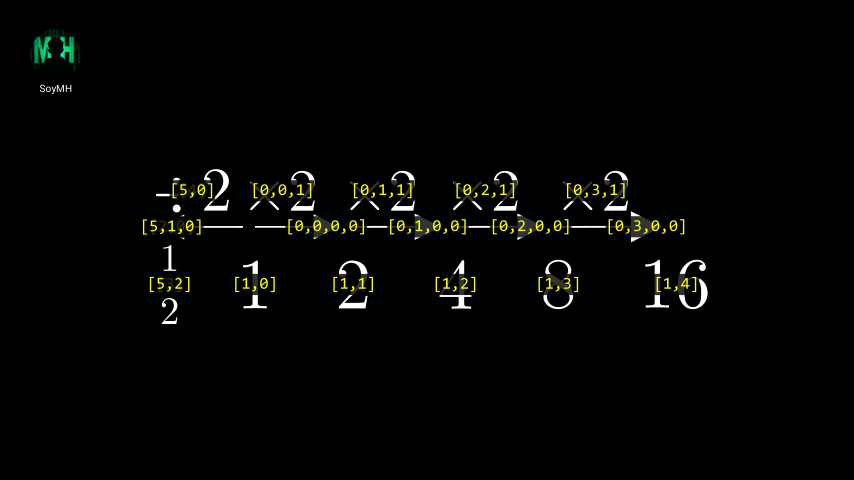

In [ ]:
class NegativeExponents(How):
    def debug_indices(self, group, color=YELLOW, font_size=20, filename=None, animate=True):
            """
            Replaces mobjects with index labels and outputs a static picture in Jupyter.
            
            Args:
                group: The VGroup to analyze.
                filename: (Optional) If provided, saves the image to disk.
                animate: If True, plays FadeOut/Write animations. If False, swaps instantly.
            """
            index_labels = VGroup()

            # --- Recursive Mapper (Fixed for recursion errors) ---
            def map_indices(mob, current_path):
                # Check for 'submobjects' to safely identify children
                # We treat MathTex/Text as leaves even though they have parts, 
                # unless you specifically want to label every letter.
                is_atomic = isinstance(mob, (MathTex, Text, Tex))
                
                if hasattr(mob, "submobjects") and len(mob.submobjects) > 0 and not is_atomic:
                    for i, child in enumerate(mob.submobjects):
                        map_indices(child, current_path + [i])
                else:
                    # It is a leaf. Create the label.
                    label_text = str(current_path).replace(" ", "")
                    label = Text(label_text, font_size=font_size, font="Consolas", color=color)
                    label.move_to(mob.get_center())
                    
                    # Add a background so text is readable over messy areas
                    label.add_background_rectangle(opacity=0.8, buff=0.05, color=BLACK)
                    index_labels.add(label)

            map_indices(group, [])

            # --- Animation / Swapping Logic ---
            if animate:
                self.play(FadeOut(group), run_time=0.5)
                self.play(Write(index_labels), run_time=1)
            else:
                # Instant swap without playing animation
                self.remove(group)
                self.add(index_labels)
                # We must wait a tiny bit to force the renderer to update the frame buffer
                self.wait(0.1)

            # --- Image Output Logic ---
            # Capture the current frame from the camera
            pixel_array = self.renderer.camera.get_image()
            self.remove(index_labels)
            
            # 1. Display in Jupyter Notebook immediately
            display(pixel_array)

            # 2. Save to file (Optional)
            if filename:
                pixel_array.save(filename)
                print(f"Saved debug image to {filename}")

    def construct(self):
        How.construct(self)

        # 1. Reveal the rule (Transform "?" to "÷2")
        # Creating the target mobject for the transform
        target_pos = self.manage_scene(indices=[0, 0, 1], action="return") # Position of first arrow label
        
        transform_target = MathTex(r"\div 2", font_size=40, color=RED).scale(2.5)
        transform_target.move_to(target_pos).shift(LEFT * 1.5)

        # Transform the label (which is currently the last item in SceneGroup: index -1)
        self.manage_scene(indices=-1, action="transform", new_mob=transform_target)
        self.wait(2)


        transform_target = MathTex(r"\frac{1}{2}", font_size=25, color=RED).scale(2.5)
        # self.debug_indices(self.SceneGroup, filename=None, animate=False)
        target_pos = self.manage_scene(indices=[3], action="return") # Position of first arrow label
        transform_target.move_to(target_pos)
        self.manage_scene(indices=[3], action="transform", new_mob=transform_target)
        # self.debug_indices(self.SceneGroup, filename=None, animate=False)

        self.play(self.SceneGroup.animate.shift(RIGHT))
        self.manage_scene(action="transform", indices=4, new_mob=self.manage_scene(action="return", indices=4).copy().set_color(WHITE))
        self.manage_scene(action="transform", indices=3, new_mob=self.manage_scene(action="return", indices=3).copy().set_color(WHITE))
        self.manage_scene(action="remove", indices=[1,5])
        # self.debug_indices(self.SceneGroup, filename=None, animate=False)
        self.manage_scene(action="group", indices=[[4],[2,0],[3]])
        self.debug_indices(self.SceneGroup, filename=None, animate=False)

%manim -ql -v WARNING --disable_caching  NegativeExponents